<h1><center>Tarea 1: Esquemas de Decodificacion Instantanea - INFO145</center></h1>


# 1. Importacion de T[1..N] y Librerias

In [423]:
#importacion libreria

%matplotlib notebook
import matplotlib.pyplot as plt
import random
import pandas as pd
import time
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [424]:
!pip install ipywidgets

In [425]:
def importarTexto(x):
    file = open(x,'r',encoding='cp1252')
    data=file.readlines() 
    file.close() 
    data_str = ""
    for i in range(len(data)):
        for j in range (len(data[i])):
            data_str += data[i][j]
    return data_str

In [426]:
data_prueba = importarTexto('prueba.txt')
data_dna = importarTexto('dna.1MB')
data_english = importarTexto('english.1MB')

# 2. Obtencion del alfabeto del texto

In [427]:
def no_esta(array,b):
    verificador = True
    for i in range(len(array)):
        if array[i] == b :
            verificador = False
    return verificador

In [428]:
def alfabeto(x):
    alfabeto = []
    for i in range(len(x)):
        if no_esta(alfabeto,x[i]):
            alfabeto +=  x[i]
    return alfabeto


In [429]:
alfabeto_dna = alfabeto(data_dna)
alfabeto_english = alfabeto(data_english)
alfabeto_prueba = alfabeto(data_prueba)

# 3. Implementacion Algoritmo Shannon

Los pasos para desarrollar este algoritmo son los siguientes: 
* **(1) Para una secuencia de símbolos, se calcula la correspondiente lista de frecuencias de aparición de los símbolos**
* **(2) Se ordena la lista de símbolos según su frecuencia en orden decreciente**
* **(3) Se divide la lista en dos partes, de forma que la suma total de frecuencias de las 2 mitades sean lo más cercana posible**
* **(4)  A la mitad superior de la lista se le asigna el dígito binario 1, y a la mitad inferior se le asigna el dígito binario 0. Esto significa que los códigos de los símbolos en la primera mitad empezarán todos con 1 y los códigos en la segunda mitad empezarán todos con 0**
* **(5) Recursivamente se aplica el mismo procedimiento a cada una de las dos mitades, se subdivide en grupos y se agregan bits a las códigos hasta que cada grupo conste de un único símbolo**

In [430]:
def probabilidad(simbolo,simbolo_totales,sec): # funcion para calcular probabilidades
    contador = 0
    contador = contador + sec.count(simbolo)
    return contador/simbolo_totales
def get_indice(x): # obtiene el indice donde se va a dividir la lista
    c= 0
    q= len(x)-1
    a = x.Probabilidad[c]
    b = x.Probabilidad[q]
    while (c+1) != q and c!=q:
        if b<=a:
            b += x.Probabilidad[(q-1)]
            q -= 1
        if a<b :
            a += x.Probabilidad[(c+1)]
            c+= 1
    if c== q :
        c -= 1
    return c,q 
def div_list(x): # divide las lista en 2 
        fin_lista_1 = get_indice(x)[0]
        comienzo_lista_2 = get_indice(x)[1]
        div_1 = x[0:fin_lista_1+1]
        div_2 = x[comienzo_lista_2:]
        return div_1, div_2
def code(x):
    if len(x)>=2:
        table_1 = div_list(x)[0] #obtiene la lista de la mitad superior
        table_2 = div_list(x)[1] #obtiene la lista de la mitad inferior
        table_1.Code += '1'
        code(table_1)  # recursivamente codifica la lista de la mitad superior
        table_2.Code +='0'
        code(table_2)  # recursivamente codifica la lista de la mitad superior
        return x

def shannon(x, sec): # x corresponde al alfabeto , sec a secuencia
#........................................................................................................................
#......................Primero se calculara la frecuencia de los simbolos del alfabeto....................................
#.........................................................................................................................
    simbolos_totales = len(sec) #numero total de simbolos de la secuencia
    proba = [] # se crea un arreglo con  sus probabilidades 
    for i in range(len(x)):
        proba += [probabilidad(x[i],simbolos_totales,sec)]
#..........................................................................................................................
#......................Se Creara un dataframe con los simbolos y sus probabilidades........................................
#..........................................................................................................................
    df = pd.DataFrame({'Simbolo': x,'Probabilidad': proba, 'Code': ''})
    df.index = df['Simbolo']
    df.drop(['Simbolo'], axis= 1 , inplace= True)
#...........................................................................................................................
#.............................Ordenamiento de las probabilidades(Descendente)...............................................
#...........................................................................................................................
    df.sort_values(by=['Probabilidad'], ascending = False, inplace = True)
#............................................................................................................................
#..........................................Obtencion del alfabeto de codificacion............................................
#............................................................................................................................
    df = code(df)
    a = df.copy()
    return a
#............................................................................................................................
#...............................................Codificacion.................................................................
#............................................................................................................................
def codificacionShannon(x,sec,largo):# x corresponde al alfabeto , sec a secuencia, largo = tramo de la secuencia a codificar
    df = shannon(x,sec)
    codificacion = ''
    for i in range(largo): # largo tiene que se >0
        codificacion += df[df.index == sec[i]].Code[0]
    return codificacion
        

# 4. Implementacion Algoritmo Decodificacion Shannon

In [432]:
def dividirTabla(tabla,k,cod): #funcion para dividir la tabla donde tabla = tabla, k=posicion de tabla.Code[j][k],
                               #cod = la posicion x de nuestro codigo codigo[i]
    j = 0 #parte en j= 0, j sera el largo de nuestra nueva tabla si es 1 o el inicio de nuestra nueva tabla si es 0
    if cod == '1': # si es 1 entonces a j se le sumara unos hasta que en la columna de codigos de la tabla el elemento k sea
                   # distinto de 1
        while(tabla.Code[j][k] =='1') :
            j += 1
        return tabla[0:j] # retorno la tabla desde la posicion 0 hasta la j ya que esta me devolvera todos los valores que en la
                         #k-esima posicion sean 1 ( esto se hizo asi por que siempre las tablas de shannon parten con 1xxxx y
                            #termina con 0xxxx
    if cod == '0': # si es 0 entonces a j se le sumaran unos hasta que en la columna de codigos de la tabla el elemento k sea
                    # igual a 0
        while(tabla.Code[j][k] !='0'):
            j += 1
        return tabla[j:len(tabla)] #retorna la tabla desde la posicion j hasta el largo de la tabla actual
    

def decodificacionShannon(x,sec,codigo):
    decodificacion = ''
    tabla = shannon(x,sec) # obtengo la tabla
    tabla_inicial = tabla.copy() # hago una copia de la tabla
    k = 0
    for i in range(len(codigo)):
        tabla = dividirTabla(tabla,k,codigo[i]) #divide recursivamente la tabla hasta llegar a una con largo 1
        k += 1 # se le suma 1 a k para que la siguiente vez que entre a la funcion dividirTabla busque en el segundo elemento
               #de la columna code de la tabla
        if len(tabla)==1 : #al llegar al largo 1 obtendremos el indice de esta ya que este pertenece al simbolo
            decodificacion += tabla.index[0] #concateno el simbolo con lo que estaba antes para asi ir formando la decodificacion
            tabla = tabla_inicial # reseteo la tabla para que al buscar el segundo simbolo esta parta de 0 
            k=0 #reseteo el k para a la siguiente vuelta busque en tabla.Code[j][0]
    return decodificacion

# 5. Implementacion Algoritmo Huffman Canonico

In [435]:
class Node: # declaracion de variables para crear los nodos
    # properties
    probability = 0.0 # inicializamos 
    symbol = ""
    encoding = "" 
    visited = False
    parent = -1 # longitud de 0 a -1    

In [436]:
class Huffman: # declaracion de variables para la creacion del arbol de Huffman
    Tree = None # retornar arbol
    Root = None # retornar raiz
    Nodes = [] #Lista
    probs = {} #bloque
    dictEncoder = {}
    
    # métodos
    def __init__(self, symbols):
        self.initNodes(symbols)
        self.buildTree()
        self.buildDictionary()
    
    def initNodes(self, probs): # creamos los nodos con sus respectivas probabiliddes
        for symbol in probs:
            node = Node() # inicializamos el node
            node.symbol = symbol 
            node.probability = probs[symbol] # asignamos una probabilidad a cada simbolo o letra
            node.visited = False # variable q no es fija que va ir cambiando 
            self.Nodes.append(node) # creamos una lista por cada nodo creado
            self.probs[symbol]=probs[symbol]  # establece para cada probabilidad un simbolo    
            
    def buildTree(self): # Realizamos las operaciones de acuerdo al regamente para la construccion del arbol de Huffman
        indexMin1 = self.getNodeWithMinimumProb() # Buscamos el menor numero de la primera probabilidad
        indexMin2 = self.getNodeWithMinimumProb() # Buscamos el menor numero de la segunda probabilidad 
        
        while indexMin1 != -1 and indexMin2 != -1: # != evalúa como verdadero si 2 variables son diferentes
            node = Node() # inicializamos
            node.symbol = "."
            node.encoding = ""
            # llamamos a las dos probabilidades minimas
            prob1 = self.Nodes[indexMin1].probability
            prob2 = self.Nodes[indexMin2].probability
            node.probability = prob1 + prob2 # sumamos las probabilidades
            node.visited = False # false = 1
            node.parent = -1 # restamos la probabilidad a -1
            self.Nodes.append(node)
            self.Nodes[indexMin1].parent = len(self.Nodes) - 1 #  lista o cadena que queremos medir
            self.Nodes[indexMin2].parent = len(self.Nodes) - 1
            
            # Regla: 0 a mayor probabilidad, 1 a menor probabilidad.
            if prob1 >= prob2:
                self.Nodes[indexMin1].encoding = "0"
                self.Nodes[indexMin2].encoding = "1"
            else:
                self.Nodes[indexMin1].encoding = "1"
                self.Nodes[indexMin2].encoding = "0"
            
            indexMin1 = self.getNodeWithMinimumProb()
            indexMin2 = self.getNodeWithMinimumProb()
            
    def getNodeWithMinimumProb(self): # realizamos una comparacion para obtener el nodo de menor probabilidad
        minProb = 1.0   # La minima probabilidad no puede ser mayor de 1
        indexMin = -1 # indice para restar a la probalidad

        for index in range(0, len(self.Nodes)): # index es el numero de probabilidad 
            if (self.Nodes[index].probability < minProb  and (not self.Nodes[index].visited)):
                minProb = self.Nodes[index].probability
                indexMin = index

        if indexMin != -1:
            self.Nodes[indexMin].visited = True

        return indexMin
    
    def showSymbolEncoding(self, symbol): # designamos un codigo binario a cada simbolo resuelto por el arbol de Huffman
        found = False
        index = 0
        encoding = ""

        for i  in range(0, len(self.Nodes)):
            if self.Nodes[i].symbol == symbol:
                found = True
                index = i
                break 
        
        if found: # encontro 
            while index != -1: # si son diferentes
                encoding = "%s%s" % (self.Nodes[index].encoding, encoding)      
                index = self.Nodes[index].parent
        else:
            encoding = "simbolo desconocido"

        return encoding
    
    def buildDictionary(self): # creamos un diccionario, guardamos todos los simbolos con sus respectivos codigos binarios resueltos por el arbol de Huffman
        for symbol in self.probs:
            encoding = self.showSymbolEncoding(symbol)
            self.dictEncoder[symbol] = encoding
                
    def encode(self, plain): # agrupa los codigos binarios codificados de acuerdo al mensaje escrito en consola
        encoded = ""
        for symbol in plain:
            encoded = "%s%s" % (encoded, self.dictEncoder[symbol])

        return encoded
    
    ##DECODIFICACION DE HUFFMAN
    
    def decode(self, encoded): # recibe la cadena del codigo binario enviado desde el emisor para decodificar
        index = 0
        decoded = ""
    

        while index < len(encoded): # mientras buscamos en la longitud de la parte codificada

    
            founf = False # establesemos una variable
    
            aux = encoded[index:] # va a buscar a cada parte codificada un simbolo
                                  # no va ser fija va ir buscando cual es compatible con cada una

    
            for symbol in self.probs:
                if aux.startswith(self.dictEncoder[symbol]): # se comprueba si la cadena es verdadera o falsa. si la parte axuliar inicia dentro del diccionario encodificado  nos va a dar
                    decoded = "%s%s" % (decoded, symbol) # parte decodificada
                    index = index + len(self.dictEncoder[symbol]) # busqueda para cada simbolo a cada probabilidad
                    break 
        
        return decoded

In [437]:
mensaje = data_english[0:3000]
simbolos=''
probs=[]
msm=mensaje
d=0

for i in mensaje:
        if i in msm:
            simbolos+=i
            probs.append(float(float ( msm.count(i))/float(len(mensaje))))
            msm=msm.replace(i,'')
            d+= 1
symbols=dict(zip(simbolos, probs))
huffman = Huffman(symbols)
for symbol in symbols:
    encoded = huffman.encode(mensaje)
data = encoded # este tiene la codificacionH
decoded = huffman.decode(data)

# Experimentacion

## Tiempo de extraccion de prefijos del texto

In [456]:
codificacionF_dna = codificacionShannon(alfabeto_dna,data_dna,3000)
codificacionF_english = codificacionShannon(alfabeto_english,data_english,3000)
codificacionH_dna = huffman.encode(data_dna[0:3000])
codificacionH_english = huffman.encode(data_english[0:3000])

In [457]:
data1 = data_dna[0:random.randrange(3000)]
data2 = data_english[0:random.randrange(3000)]


In [458]:
inicio = time.time()
decodificacion = decodificacionShannon(alfabeto_dna,data_dna,codificacionF_dna)
decodificacionF_dna = decodificacion[0:len(data1)]
final = time.time()
print(round(final-inicio,1),'en decodificar por shannon el texto dna')

2.0 en decodificar por shannon el texto dna


In [459]:
## para el texto english
inicio = time.time()
decodificacion = decodificacionShannon(alfabeto_english,data_english,codificacionF_english)
decodificacionF_english = decodificacion[0:len(data2)]
final = time.time()
print(round(final-inicio,1),'en decodificar por shannon el texto english')

5.8 en decodificar por shannon el texto english


In [460]:
#se comprobara que ambas sean iguales
print(data1 == decodificacionF_dna)
print(data2 == decodificacionF_english)

True
True


In [461]:
inicio = time.time()
decodificacionH_dna = huffman.decode(codificacionH_dna)
decodificacionH_dna = decodificacionH_dna[0:len(data1)]
final = time.time()
print(round(final-inicio,1),'en decodificar por huffman el texto dna')

inicio = time.time()
decodificacionH_en = huffman.decode(codificacionH_english)
decodificacionH_en = decodificacionH_en[0:len(data2)]
print(round(final-inicio,1),'en decodificar por huffman el texto english')
final = time.time()

0.1 en decodificar por huffman el texto dna
0.0 en decodificar por huffman el texto english


In [462]:
#se comprobara
print(data1 == decodificacionH_dna)
print(data2 == decodificacionH_en)

True
True


In [469]:
def f(texto):
    data1 = data_dna[0:random.randrange(3000)]
    data2 = data_english[0:random.randrange(3000)]
    #para texto dna
    if texto =="data_dna":
        #shannon
        ax[0].cla()
        inicio = time.time()
        decodificacion = decodificacionShannon(alfabeto_dna,data_dna,codificacionF_dna)
        decodificacionF_dna = decodificacion[0:len(data1)]
        final = time.time()
        tiempoF = round(final-inicio,1)
        #huffman
        inicio = time.time()
        decodificacionH_dna = huffman.decode(codificacionH_dna)
        decodificacionH_dna = decodificacionH_dna[0:len(data1)]
        final = time.time()
        tiempoH = round(final-inicio,1)
        ax[0].bar(tiempoF,len(data1))
        ax[0].bar(tiempoH,len(data1))
    else:
        ## para el texto english fano
        ax[1].cla()
        inicio = time.time()
        decodificacion = decodificacionShannon(alfabeto_english,data_english,codificacionF_english)
        decodificacionF_english = decodificacion[0:len(data2)]
        final = time.time()
        tiempoF= round(final-inicio,1)
        #huffman
        inicio = time.time()
        decodificacionH_dna = huffman.decode(codificacionH_dna)
        decodificacionH_dna = decodificacionH_dna[0:len(data1)]
        final = time.time()
        tiempoH = round(final-inicio,1)
        ax[1].bar(tiempoF,len(data2))
        ax[1].bar(tiempoH,len(data2))

interactive(children=(Dropdown(description='texto', options=('data_english', 'data_dna'), value='data_english'…

<IPython.core.display.Javascript object>


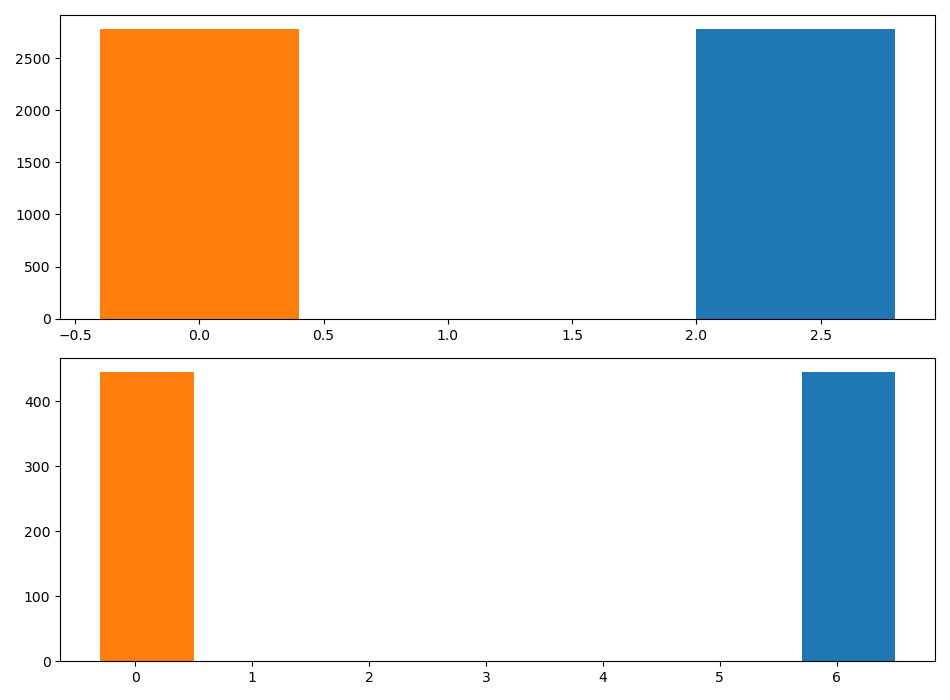

In [470]:
interact(f, texto = ["data_english", "data_dna"]);

fig, ax = plt.subplots(nrows= 2 ,ncols = 1, figsize=(9.5, 7), tight_layout=True, facecolor='w');
ax[0].set_title('Comparacion para texto dna Huffman y Shannon');
ax[1].set_title('Comparacion para texto english huffman y shannon');